In this notebook we evaluate GIRAFFE by comparing it to different benchmarks on kidney GTEx data. We use CHIP-seq as groundtruth. 

## 1. Loading data

In [2]:
import giraffe
import matplotlib.pyplot as plt
from netZooPy.otter.otter import otter
from netZooPy.panda import Panda
import notebooks
import numpy as np
import pandas as pd
import preprocessing
from sklearn.metrics import roc_curve, auc

In [5]:
cache = True

In [2]:
if !cache:
    preprocessing.generate_data() 
expression = pd.read_csv("data/kidney/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/kidney/motif.csv", index_col = 0)
ppi = pd.read_csv("data/kidney/ppi_matrix.csv", index_col = 0)

In [3]:
print(expression.shape)
print(motif.shape)
print(ppi.shape)

(25224, 544)
(1149, 38723)
(1132, 1132)


## 2. Validation

In [4]:
def transform_output(R):
    chip = pd.read_csv("data/kidney/raw/chip.csv", index_col = 0).T
    
    chip.sort_index(inplace=True)
    chip.sort_index(axis=1,inplace=True)

    R.sort_index(inplace=True)
    R.sort_index(axis=1,inplace=True)

    commonTFs  = chip.index[chip.index.isin(R.index)]
    commonGenes= chip.columns[chip.columns.isin(R.columns)]

    chip = chip.loc[commonTFs, commonGenes]
    R = R.loc[commonTFs, commonGenes]
    return R, chip

## 3. Benchmarks

### 3.1 PANDA [1]

In [6]:
if cache:
    R_panda_raw = pd.read_csv("data/kidney/R_panda.csv", index_col = 0)
else:
    R_panda_raw = Panda(
        "data/kidney/raw/expression.csv",
        "data/kidney/raw/motif.txt",
        "data/kidney/raw/PPI.csv",
        save_tmp=False,
        save_memory=False,
        remove_missing=False,
        keep_expression_matrix=False
    ).panda_network
R_panda, chip = transform_output(R_panda_raw.T)

### 3.2 GIRAFFE

In [8]:
expression = expression.loc[expression.index.isin(R_panda_raw.columns), :]
R_0 = motif.iloc[motif.index.isin(R_panda_raw.index), motif.columns.isin(R_panda_raw.columns)].T

In [27]:
if cache:
    R_giraffe_raw = pd.read_csv("data/kidney/R_giraffe.csv", index_col = 0)
else:
    R_giraffe_raw = giraffe.Giraffe(expression, R_0.to_numpy(), ppi + np.eye(ppi.shape[0]), save_computation = True,iterations=50).get_regulation()
R_giraffe, chip_g = transform_output(pd.DataFrame(R_giraffe_raw, index = R_panda_raw.columns, columns = R_panda_raw.index))

### 3.3 OTTER [2]

In [12]:
if cache:
    R_otter_raw = pd.read_csv("data/kidney/R_otter.csv", index_col = 0)
else:
    R_otter_raw = otter(R_0.T.to_numpy(), ppi + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy()))
R_otter, chip = transform_output(pd.DataFrame(R_otter_raw.T.to_numpy(), index = R_panda_raw.columns, columns = R_panda_raw.index))

### 3.4 Motif-based prior

In [13]:
R_motif, chip = transform_output(R_0)

### 3.5 GENIE3 [3]

In [11]:
model = notebooks.GENIE3(expression.to_numpy().T, gene_names = list(expression.index) ,regulators = list(R_panda_raw.index), ntrees=100)

Tree method: RF
K: sqrt
Number of trees: 5


running single threaded jobs
Gene 1/24815...
Gene 2/24815...
Gene 3/24815...
Gene 4/24815...
Gene 5/24815...
Gene 6/24815...
Gene 7/24815...
Gene 8/24815...
Gene 9/24815...
Gene 10/24815...
Gene 11/24815...
Gene 12/24815...
Gene 13/24815...
Gene 14/24815...
Gene 15/24815...
Gene 16/24815...
Gene 17/24815...
Gene 18/24815...
Gene 19/24815...
Gene 20/24815...
Gene 21/24815...
Gene 22/24815...
Gene 23/24815...
Gene 24/24815...
Gene 25/24815...
Gene 26/24815...
Gene 27/24815...
Gene 28/24815...
Gene 29/24815...
Gene 30/24815...
Gene 31/24815...
Gene 32/24815...
Gene 33/24815...
Gene 34/24815...
Gene 35/24815...
Gene 36/24815...
Gene 37/24815...
Gene 38/24815...
Gene 39/24815...
Gene 40/24815...
Gene 41/24815...
Gene 42/24815...
Gene 43/24815...
Gene 44/24815...
Gene 45/24815...
Gene 46/24815...
Gene 47/24815...
Gene 48/24815...
Gene 49/24815...
Gene 50/24815...
Gene 51/24815...
Gene 52/24815...
Gene 53/24815...
Gene 54/24815...
Gene 55/24815...


Gene 463/24815...
Gene 464/24815...
Gene 465/24815...
Gene 466/24815...
Gene 467/24815...
Gene 468/24815...
Gene 469/24815...
Gene 470/24815...
Gene 471/24815...
Gene 472/24815...
Gene 473/24815...
Gene 474/24815...
Gene 475/24815...
Gene 476/24815...
Gene 477/24815...
Gene 478/24815...
Gene 479/24815...
Gene 480/24815...
Gene 481/24815...
Gene 482/24815...
Gene 483/24815...
Gene 484/24815...
Gene 485/24815...
Gene 486/24815...
Gene 487/24815...
Gene 488/24815...
Gene 489/24815...
Gene 490/24815...
Gene 491/24815...
Gene 492/24815...
Gene 493/24815...
Gene 494/24815...
Gene 495/24815...
Gene 496/24815...
Gene 497/24815...
Gene 498/24815...
Gene 499/24815...
Gene 500/24815...
Gene 501/24815...
Gene 502/24815...
Gene 503/24815...
Gene 504/24815...
Gene 505/24815...
Gene 506/24815...
Gene 507/24815...
Gene 508/24815...
Gene 509/24815...
Gene 510/24815...
Gene 511/24815...
Gene 512/24815...
Gene 513/24815...
Gene 514/24815...
Gene 515/24815...
Gene 516/24815...
Gene 517/24815...
Gene 518/2

Gene 924/24815...
Gene 925/24815...
Gene 926/24815...
Gene 927/24815...
Gene 928/24815...
Gene 929/24815...
Gene 930/24815...
Gene 931/24815...
Gene 932/24815...
Gene 933/24815...
Gene 934/24815...
Gene 935/24815...
Gene 936/24815...
Gene 937/24815...
Gene 938/24815...
Gene 939/24815...
Gene 940/24815...
Gene 941/24815...
Gene 942/24815...
Gene 943/24815...
Gene 944/24815...
Gene 945/24815...
Gene 946/24815...
Gene 947/24815...
Gene 948/24815...
Gene 949/24815...
Gene 950/24815...
Gene 951/24815...
Gene 952/24815...
Gene 953/24815...
Gene 954/24815...
Gene 955/24815...
Gene 956/24815...
Gene 957/24815...
Gene 958/24815...
Gene 959/24815...
Gene 960/24815...
Gene 961/24815...
Gene 962/24815...
Gene 963/24815...
Gene 964/24815...
Gene 965/24815...
Gene 966/24815...
Gene 967/24815...
Gene 968/24815...
Gene 969/24815...
Gene 970/24815...
Gene 971/24815...
Gene 972/24815...
Gene 973/24815...
Gene 974/24815...
Gene 975/24815...
Gene 976/24815...
Gene 977/24815...
Gene 978/24815...
Gene 979/2

Gene 1362/24815...
Gene 1363/24815...
Gene 1364/24815...
Gene 1365/24815...
Gene 1366/24815...
Gene 1367/24815...
Gene 1368/24815...
Gene 1369/24815...
Gene 1370/24815...
Gene 1371/24815...
Gene 1372/24815...
Gene 1373/24815...
Gene 1374/24815...
Gene 1375/24815...
Gene 1376/24815...
Gene 1377/24815...
Gene 1378/24815...
Gene 1379/24815...
Gene 1380/24815...
Gene 1381/24815...
Gene 1382/24815...
Gene 1383/24815...
Gene 1384/24815...
Gene 1385/24815...
Gene 1386/24815...
Gene 1387/24815...
Gene 1388/24815...
Gene 1389/24815...
Gene 1390/24815...
Gene 1391/24815...
Gene 1392/24815...
Gene 1393/24815...
Gene 1394/24815...
Gene 1395/24815...
Gene 1396/24815...
Gene 1397/24815...
Gene 1398/24815...
Gene 1399/24815...
Gene 1400/24815...
Gene 1401/24815...
Gene 1402/24815...
Gene 1403/24815...
Gene 1404/24815...
Gene 1405/24815...
Gene 1406/24815...
Gene 1407/24815...
Gene 1408/24815...
Gene 1409/24815...
Gene 1410/24815...
Gene 1411/24815...
Gene 1412/24815...
Gene 1413/24815...
Gene 1414/24

Gene 1800/24815...
Gene 1801/24815...
Gene 1802/24815...
Gene 1803/24815...
Gene 1804/24815...
Gene 1805/24815...
Gene 1806/24815...
Gene 1807/24815...
Gene 1808/24815...
Gene 1809/24815...
Gene 1810/24815...
Gene 1811/24815...
Gene 1812/24815...
Gene 1813/24815...
Gene 1814/24815...
Gene 1815/24815...
Gene 1816/24815...
Gene 1817/24815...
Gene 1818/24815...
Gene 1819/24815...
Gene 1820/24815...
Gene 1821/24815...
Gene 1822/24815...
Gene 1823/24815...
Gene 1824/24815...
Gene 1825/24815...
Gene 1826/24815...
Gene 1827/24815...
Gene 1828/24815...
Gene 1829/24815...
Gene 1830/24815...
Gene 1831/24815...
Gene 1832/24815...
Gene 1833/24815...
Gene 1834/24815...
Gene 1835/24815...
Gene 1836/24815...
Gene 1837/24815...
Gene 1838/24815...
Gene 1839/24815...
Gene 1840/24815...
Gene 1841/24815...
Gene 1842/24815...
Gene 1843/24815...
Gene 1844/24815...
Gene 1845/24815...
Gene 1846/24815...
Gene 1847/24815...
Gene 1848/24815...
Gene 1849/24815...
Gene 1850/24815...
Gene 1851/24815...
Gene 1852/24

Gene 2238/24815...
Gene 2239/24815...
Gene 2240/24815...
Gene 2241/24815...
Gene 2242/24815...
Gene 2243/24815...
Gene 2244/24815...
Gene 2245/24815...
Gene 2246/24815...
Gene 2247/24815...
Gene 2248/24815...
Gene 2249/24815...
Gene 2250/24815...
Gene 2251/24815...
Gene 2252/24815...
Gene 2253/24815...
Gene 2254/24815...
Gene 2255/24815...
Gene 2256/24815...
Gene 2257/24815...
Gene 2258/24815...
Gene 2259/24815...
Gene 2260/24815...
Gene 2261/24815...
Gene 2262/24815...
Gene 2263/24815...
Gene 2264/24815...
Gene 2265/24815...
Gene 2266/24815...
Gene 2267/24815...
Gene 2268/24815...
Gene 2269/24815...
Gene 2270/24815...
Gene 2271/24815...
Gene 2272/24815...
Gene 2273/24815...
Gene 2274/24815...
Gene 2275/24815...
Gene 2276/24815...
Gene 2277/24815...
Gene 2278/24815...
Gene 2279/24815...
Gene 2280/24815...
Gene 2281/24815...
Gene 2282/24815...
Gene 2283/24815...
Gene 2284/24815...
Gene 2285/24815...
Gene 2286/24815...
Gene 2287/24815...
Gene 2288/24815...
Gene 2289/24815...
Gene 2290/24

Gene 2674/24815...
Gene 2675/24815...
Gene 2676/24815...
Gene 2677/24815...
Gene 2678/24815...
Gene 2679/24815...
Gene 2680/24815...
Gene 2681/24815...
Gene 2682/24815...
Gene 2683/24815...
Gene 2684/24815...
Gene 2685/24815...
Gene 2686/24815...
Gene 2687/24815...
Gene 2688/24815...
Gene 2689/24815...
Gene 2690/24815...
Gene 2691/24815...
Gene 2692/24815...
Gene 2693/24815...
Gene 2694/24815...
Gene 2695/24815...
Gene 2696/24815...
Gene 2697/24815...
Gene 2698/24815...
Gene 2699/24815...
Gene 2700/24815...
Gene 2701/24815...
Gene 2702/24815...
Gene 2703/24815...
Gene 2704/24815...
Gene 2705/24815...
Gene 2706/24815...
Gene 2707/24815...
Gene 2708/24815...
Gene 2709/24815...
Gene 2710/24815...
Gene 2711/24815...
Gene 2712/24815...
Gene 2713/24815...
Gene 2714/24815...
Gene 2715/24815...
Gene 2716/24815...
Gene 2717/24815...
Gene 2718/24815...
Gene 2719/24815...
Gene 2720/24815...
Gene 2721/24815...
Gene 2722/24815...
Gene 2723/24815...
Gene 2724/24815...
Gene 2725/24815...
Gene 2726/24

Gene 3106/24815...
Gene 3107/24815...
Gene 3108/24815...
Gene 3109/24815...
Gene 3110/24815...
Gene 3111/24815...
Gene 3112/24815...
Gene 3113/24815...
Gene 3114/24815...
Gene 3115/24815...
Gene 3116/24815...
Gene 3117/24815...
Gene 3118/24815...
Gene 3119/24815...
Gene 3120/24815...
Gene 3121/24815...
Gene 3122/24815...
Gene 3123/24815...
Gene 3124/24815...
Gene 3125/24815...
Gene 3126/24815...
Gene 3127/24815...
Gene 3128/24815...
Gene 3129/24815...
Gene 3130/24815...
Gene 3131/24815...
Gene 3132/24815...
Gene 3133/24815...
Gene 3134/24815...
Gene 3135/24815...
Gene 3136/24815...
Gene 3137/24815...
Gene 3138/24815...
Gene 3139/24815...
Gene 3140/24815...
Gene 3141/24815...
Gene 3142/24815...
Gene 3143/24815...
Gene 3144/24815...
Gene 3145/24815...
Gene 3146/24815...
Gene 3147/24815...
Gene 3148/24815...
Gene 3149/24815...
Gene 3150/24815...
Gene 3151/24815...
Gene 3152/24815...
Gene 3153/24815...
Gene 3154/24815...
Gene 3155/24815...
Gene 3156/24815...
Gene 3157/24815...
Gene 3158/24

Gene 3542/24815...
Gene 3543/24815...
Gene 3544/24815...
Gene 3545/24815...
Gene 3546/24815...
Gene 3547/24815...
Gene 3548/24815...
Gene 3549/24815...
Gene 3550/24815...
Gene 3551/24815...
Gene 3552/24815...
Gene 3553/24815...
Gene 3554/24815...
Gene 3555/24815...
Gene 3556/24815...
Gene 3557/24815...
Gene 3558/24815...
Gene 3559/24815...
Gene 3560/24815...
Gene 3561/24815...
Gene 3562/24815...
Gene 3563/24815...
Gene 3564/24815...
Gene 3565/24815...
Gene 3566/24815...
Gene 3567/24815...
Gene 3568/24815...
Gene 3569/24815...
Gene 3570/24815...
Gene 3571/24815...
Gene 3572/24815...
Gene 3573/24815...
Gene 3574/24815...
Gene 3575/24815...
Gene 3576/24815...
Gene 3577/24815...
Gene 3578/24815...
Gene 3579/24815...
Gene 3580/24815...
Gene 3581/24815...
Gene 3582/24815...
Gene 3583/24815...
Gene 3584/24815...
Gene 3585/24815...
Gene 3586/24815...
Gene 3587/24815...
Gene 3588/24815...
Gene 3589/24815...
Gene 3590/24815...
Gene 3591/24815...
Gene 3592/24815...
Gene 3593/24815...
Gene 3594/24

Gene 3975/24815...
Gene 3976/24815...
Gene 3977/24815...
Gene 3978/24815...
Gene 3979/24815...
Gene 3980/24815...
Gene 3981/24815...
Gene 3982/24815...
Gene 3983/24815...
Gene 3984/24815...
Gene 3985/24815...
Gene 3986/24815...
Gene 3987/24815...
Gene 3988/24815...
Gene 3989/24815...
Gene 3990/24815...
Gene 3991/24815...
Gene 3992/24815...
Gene 3993/24815...
Gene 3994/24815...
Gene 3995/24815...
Gene 3996/24815...
Gene 3997/24815...
Gene 3998/24815...
Gene 3999/24815...
Gene 4000/24815...
Gene 4001/24815...
Gene 4002/24815...
Gene 4003/24815...
Gene 4004/24815...
Gene 4005/24815...
Gene 4006/24815...
Gene 4007/24815...
Gene 4008/24815...
Gene 4009/24815...
Gene 4010/24815...
Gene 4011/24815...
Gene 4012/24815...
Gene 4013/24815...
Gene 4014/24815...
Gene 4015/24815...
Gene 4016/24815...
Gene 4017/24815...
Gene 4018/24815...
Gene 4019/24815...
Gene 4020/24815...
Gene 4021/24815...
Gene 4022/24815...
Gene 4023/24815...
Gene 4024/24815...
Gene 4025/24815...
Gene 4026/24815...
Gene 4027/24

Gene 4411/24815...
Gene 4412/24815...
Gene 4413/24815...
Gene 4414/24815...
Gene 4415/24815...
Gene 4416/24815...
Gene 4417/24815...
Gene 4418/24815...
Gene 4419/24815...
Gene 4420/24815...
Gene 4421/24815...
Gene 4422/24815...
Gene 4423/24815...
Gene 4424/24815...
Gene 4425/24815...
Gene 4426/24815...
Gene 4427/24815...
Gene 4428/24815...
Gene 4429/24815...
Gene 4430/24815...
Gene 4431/24815...
Gene 4432/24815...
Gene 4433/24815...
Gene 4434/24815...
Gene 4435/24815...
Gene 4436/24815...
Gene 4437/24815...
Gene 4438/24815...
Gene 4439/24815...
Gene 4440/24815...
Gene 4441/24815...
Gene 4442/24815...
Gene 4443/24815...
Gene 4444/24815...
Gene 4445/24815...
Gene 4446/24815...
Gene 4447/24815...
Gene 4448/24815...
Gene 4449/24815...
Gene 4450/24815...
Gene 4451/24815...
Gene 4452/24815...
Gene 4453/24815...
Gene 4454/24815...
Gene 4455/24815...
Gene 4456/24815...
Gene 4457/24815...
Gene 4458/24815...
Gene 4459/24815...
Gene 4460/24815...
Gene 4461/24815...
Gene 4462/24815...
Gene 4463/24

Gene 4850/24815...
Gene 4851/24815...
Gene 4852/24815...
Gene 4853/24815...
Gene 4854/24815...
Gene 4855/24815...
Gene 4856/24815...
Gene 4857/24815...
Gene 4858/24815...
Gene 4859/24815...
Gene 4860/24815...
Gene 4861/24815...
Gene 4862/24815...
Gene 4863/24815...
Gene 4864/24815...
Gene 4865/24815...
Gene 4866/24815...
Gene 4867/24815...
Gene 4868/24815...
Gene 4869/24815...
Gene 4870/24815...
Gene 4871/24815...
Gene 4872/24815...
Gene 4873/24815...
Gene 4874/24815...
Gene 4875/24815...
Gene 4876/24815...
Gene 4877/24815...
Gene 4878/24815...
Gene 4879/24815...
Gene 4880/24815...
Gene 4881/24815...
Gene 4882/24815...
Gene 4883/24815...
Gene 4884/24815...
Gene 4885/24815...
Gene 4886/24815...
Gene 4887/24815...
Gene 4888/24815...
Gene 4889/24815...
Gene 4890/24815...
Gene 4891/24815...
Gene 4892/24815...
Gene 4893/24815...
Gene 4894/24815...
Gene 4895/24815...
Gene 4896/24815...
Gene 4897/24815...
Gene 4898/24815...
Gene 4899/24815...
Gene 4900/24815...
Gene 4901/24815...
Gene 4902/24

Gene 5284/24815...
Gene 5285/24815...
Gene 5286/24815...
Gene 5287/24815...
Gene 5288/24815...
Gene 5289/24815...
Gene 5290/24815...
Gene 5291/24815...
Gene 5292/24815...
Gene 5293/24815...
Gene 5294/24815...
Gene 5295/24815...
Gene 5296/24815...
Gene 5297/24815...
Gene 5298/24815...
Gene 5299/24815...
Gene 5300/24815...
Gene 5301/24815...
Gene 5302/24815...
Gene 5303/24815...
Gene 5304/24815...
Gene 5305/24815...
Gene 5306/24815...
Gene 5307/24815...
Gene 5308/24815...
Gene 5309/24815...
Gene 5310/24815...
Gene 5311/24815...
Gene 5312/24815...
Gene 5313/24815...
Gene 5314/24815...
Gene 5315/24815...
Gene 5316/24815...
Gene 5317/24815...
Gene 5318/24815...
Gene 5319/24815...
Gene 5320/24815...
Gene 5321/24815...
Gene 5322/24815...
Gene 5323/24815...
Gene 5324/24815...
Gene 5325/24815...
Gene 5326/24815...
Gene 5327/24815...
Gene 5328/24815...
Gene 5329/24815...
Gene 5330/24815...
Gene 5331/24815...
Gene 5332/24815...
Gene 5333/24815...
Gene 5334/24815...
Gene 5335/24815...
Gene 5336/24

Gene 5719/24815...
Gene 5720/24815...
Gene 5721/24815...
Gene 5722/24815...
Gene 5723/24815...
Gene 5724/24815...
Gene 5725/24815...
Gene 5726/24815...
Gene 5727/24815...
Gene 5728/24815...
Gene 5729/24815...
Gene 5730/24815...
Gene 5731/24815...
Gene 5732/24815...
Gene 5733/24815...
Gene 5734/24815...
Gene 5735/24815...
Gene 5736/24815...
Gene 5737/24815...
Gene 5738/24815...
Gene 5739/24815...
Gene 5740/24815...
Gene 5741/24815...
Gene 5742/24815...
Gene 5743/24815...
Gene 5744/24815...
Gene 5745/24815...
Gene 5746/24815...
Gene 5747/24815...
Gene 5748/24815...
Gene 5749/24815...
Gene 5750/24815...
Gene 5751/24815...
Gene 5752/24815...
Gene 5753/24815...
Gene 5754/24815...
Gene 5755/24815...
Gene 5756/24815...
Gene 5757/24815...
Gene 5758/24815...
Gene 5759/24815...
Gene 5760/24815...
Gene 5761/24815...
Gene 5762/24815...
Gene 5763/24815...
Gene 5764/24815...
Gene 5765/24815...
Gene 5766/24815...
Gene 5767/24815...
Gene 5768/24815...
Gene 5769/24815...
Gene 5770/24815...
Gene 5771/24

Gene 6156/24815...
Gene 6157/24815...
Gene 6158/24815...
Gene 6159/24815...
Gene 6160/24815...
Gene 6161/24815...
Gene 6162/24815...
Gene 6163/24815...
Gene 6164/24815...
Gene 6165/24815...
Gene 6166/24815...
Gene 6167/24815...
Gene 6168/24815...
Gene 6169/24815...
Gene 6170/24815...
Gene 6171/24815...
Gene 6172/24815...
Gene 6173/24815...
Gene 6174/24815...
Gene 6175/24815...
Gene 6176/24815...
Gene 6177/24815...
Gene 6178/24815...
Gene 6179/24815...
Gene 6180/24815...
Gene 6181/24815...
Gene 6182/24815...
Gene 6183/24815...
Gene 6184/24815...
Gene 6185/24815...
Gene 6186/24815...
Gene 6187/24815...
Gene 6188/24815...
Gene 6189/24815...
Gene 6190/24815...
Gene 6191/24815...
Gene 6192/24815...
Gene 6193/24815...
Gene 6194/24815...
Gene 6195/24815...
Gene 6196/24815...
Gene 6197/24815...
Gene 6198/24815...
Gene 6199/24815...
Gene 6200/24815...
Gene 6201/24815...
Gene 6202/24815...
Gene 6203/24815...
Gene 6204/24815...
Gene 6205/24815...
Gene 6206/24815...
Gene 6207/24815...
Gene 6208/24

Gene 6589/24815...
Gene 6590/24815...
Gene 6591/24815...
Gene 6592/24815...
Gene 6593/24815...
Gene 6594/24815...
Gene 6595/24815...
Gene 6596/24815...
Gene 6597/24815...
Gene 6598/24815...
Gene 6599/24815...
Gene 6600/24815...
Gene 6601/24815...
Gene 6602/24815...
Gene 6603/24815...
Gene 6604/24815...
Gene 6605/24815...
Gene 6606/24815...
Gene 6607/24815...
Gene 6608/24815...
Gene 6609/24815...
Gene 6610/24815...
Gene 6611/24815...
Gene 6612/24815...
Gene 6613/24815...
Gene 6614/24815...
Gene 6615/24815...
Gene 6616/24815...
Gene 6617/24815...
Gene 6618/24815...
Gene 6619/24815...
Gene 6620/24815...
Gene 6621/24815...
Gene 6622/24815...
Gene 6623/24815...
Gene 6624/24815...
Gene 6625/24815...
Gene 6626/24815...
Gene 6627/24815...
Gene 6628/24815...
Gene 6629/24815...
Gene 6630/24815...
Gene 6631/24815...
Gene 6632/24815...
Gene 6633/24815...
Gene 6634/24815...
Gene 6635/24815...
Gene 6636/24815...
Gene 6637/24815...
Gene 6638/24815...
Gene 6639/24815...
Gene 6640/24815...
Gene 6641/24

Gene 7021/24815...
Gene 7022/24815...
Gene 7023/24815...
Gene 7024/24815...
Gene 7025/24815...
Gene 7026/24815...
Gene 7027/24815...
Gene 7028/24815...
Gene 7029/24815...
Gene 7030/24815...
Gene 7031/24815...
Gene 7032/24815...
Gene 7033/24815...
Gene 7034/24815...
Gene 7035/24815...
Gene 7036/24815...
Gene 7037/24815...
Gene 7038/24815...
Gene 7039/24815...
Gene 7040/24815...
Gene 7041/24815...
Gene 7042/24815...
Gene 7043/24815...
Gene 7044/24815...
Gene 7045/24815...
Gene 7046/24815...
Gene 7047/24815...
Gene 7048/24815...
Gene 7049/24815...
Gene 7050/24815...
Gene 7051/24815...
Gene 7052/24815...
Gene 7053/24815...
Gene 7054/24815...
Gene 7055/24815...
Gene 7056/24815...
Gene 7057/24815...
Gene 7058/24815...
Gene 7059/24815...
Gene 7060/24815...
Gene 7061/24815...
Gene 7062/24815...
Gene 7063/24815...
Gene 7064/24815...
Gene 7065/24815...
Gene 7066/24815...
Gene 7067/24815...
Gene 7068/24815...
Gene 7069/24815...
Gene 7070/24815...
Gene 7071/24815...
Gene 7072/24815...
Gene 7073/24

Gene 7455/24815...
Gene 7456/24815...
Gene 7457/24815...
Gene 7458/24815...
Gene 7459/24815...
Gene 7460/24815...
Gene 7461/24815...
Gene 7462/24815...
Gene 7463/24815...
Gene 7464/24815...
Gene 7465/24815...
Gene 7466/24815...
Gene 7467/24815...
Gene 7468/24815...
Gene 7469/24815...
Gene 7470/24815...
Gene 7471/24815...
Gene 7472/24815...
Gene 7473/24815...
Gene 7474/24815...
Gene 7475/24815...
Gene 7476/24815...
Gene 7477/24815...
Gene 7478/24815...
Gene 7479/24815...
Gene 7480/24815...
Gene 7481/24815...
Gene 7482/24815...
Gene 7483/24815...
Gene 7484/24815...
Gene 7485/24815...
Gene 7486/24815...
Gene 7487/24815...
Gene 7488/24815...
Gene 7489/24815...
Gene 7490/24815...
Gene 7491/24815...
Gene 7492/24815...
Gene 7493/24815...
Gene 7494/24815...
Gene 7495/24815...
Gene 7496/24815...
Gene 7497/24815...
Gene 7498/24815...
Gene 7499/24815...
Gene 7500/24815...
Gene 7501/24815...
Gene 7502/24815...
Gene 7503/24815...
Gene 7504/24815...
Gene 7505/24815...
Gene 7506/24815...
Gene 7507/24

Gene 7894/24815...
Gene 7895/24815...
Gene 7896/24815...
Gene 7897/24815...
Gene 7898/24815...
Gene 7899/24815...
Gene 7900/24815...
Gene 7901/24815...
Gene 7902/24815...
Gene 7903/24815...
Gene 7904/24815...
Gene 7905/24815...
Gene 7906/24815...
Gene 7907/24815...
Gene 7908/24815...
Gene 7909/24815...
Gene 7910/24815...
Gene 7911/24815...
Gene 7912/24815...
Gene 7913/24815...
Gene 7914/24815...
Gene 7915/24815...
Gene 7916/24815...
Gene 7917/24815...
Gene 7918/24815...
Gene 7919/24815...
Gene 7920/24815...
Gene 7921/24815...
Gene 7922/24815...
Gene 7923/24815...
Gene 7924/24815...
Gene 7925/24815...
Gene 7926/24815...
Gene 7927/24815...
Gene 7928/24815...
Gene 7929/24815...
Gene 7930/24815...
Gene 7931/24815...
Gene 7932/24815...
Gene 7933/24815...
Gene 7934/24815...
Gene 7935/24815...
Gene 7936/24815...
Gene 7937/24815...
Gene 7938/24815...
Gene 7939/24815...
Gene 7940/24815...
Gene 7941/24815...
Gene 7942/24815...
Gene 7943/24815...
Gene 7944/24815...
Gene 7945/24815...
Gene 7946/24

Gene 8328/24815...
Gene 8329/24815...
Gene 8330/24815...
Gene 8331/24815...
Gene 8332/24815...
Gene 8333/24815...
Gene 8334/24815...
Gene 8335/24815...
Gene 8336/24815...
Gene 8337/24815...
Gene 8338/24815...
Gene 8339/24815...
Gene 8340/24815...
Gene 8341/24815...
Gene 8342/24815...
Gene 8343/24815...
Gene 8344/24815...
Gene 8345/24815...
Gene 8346/24815...
Gene 8347/24815...
Gene 8348/24815...
Gene 8349/24815...
Gene 8350/24815...
Gene 8351/24815...
Gene 8352/24815...
Gene 8353/24815...
Gene 8354/24815...
Gene 8355/24815...
Gene 8356/24815...
Gene 8357/24815...
Gene 8358/24815...
Gene 8359/24815...
Gene 8360/24815...
Gene 8361/24815...
Gene 8362/24815...
Gene 8363/24815...
Gene 8364/24815...
Gene 8365/24815...
Gene 8366/24815...
Gene 8367/24815...
Gene 8368/24815...
Gene 8369/24815...
Gene 8370/24815...
Gene 8371/24815...
Gene 8372/24815...
Gene 8373/24815...
Gene 8374/24815...
Gene 8375/24815...
Gene 8376/24815...
Gene 8377/24815...
Gene 8378/24815...
Gene 8379/24815...
Gene 8380/24

Gene 8762/24815...
Gene 8763/24815...
Gene 8764/24815...
Gene 8765/24815...
Gene 8766/24815...
Gene 8767/24815...
Gene 8768/24815...
Gene 8769/24815...
Gene 8770/24815...
Gene 8771/24815...
Gene 8772/24815...
Gene 8773/24815...
Gene 8774/24815...
Gene 8775/24815...
Gene 8776/24815...
Gene 8777/24815...
Gene 8778/24815...
Gene 8779/24815...
Gene 8780/24815...
Gene 8781/24815...
Gene 8782/24815...
Gene 8783/24815...
Gene 8784/24815...
Gene 8785/24815...
Gene 8786/24815...
Gene 8787/24815...
Gene 8788/24815...
Gene 8789/24815...
Gene 8790/24815...
Gene 8791/24815...
Gene 8792/24815...
Gene 8793/24815...
Gene 8794/24815...
Gene 8795/24815...
Gene 8796/24815...
Gene 8797/24815...
Gene 8798/24815...
Gene 8799/24815...
Gene 8800/24815...
Gene 8801/24815...
Gene 8802/24815...
Gene 8803/24815...
Gene 8804/24815...
Gene 8805/24815...
Gene 8806/24815...
Gene 8807/24815...
Gene 8808/24815...
Gene 8809/24815...
Gene 8810/24815...
Gene 8811/24815...
Gene 8812/24815...
Gene 8813/24815...
Gene 8814/24

Gene 9195/24815...
Gene 9196/24815...
Gene 9197/24815...
Gene 9198/24815...
Gene 9199/24815...
Gene 9200/24815...
Gene 9201/24815...
Gene 9202/24815...
Gene 9203/24815...
Gene 9204/24815...
Gene 9205/24815...
Gene 9206/24815...
Gene 9207/24815...
Gene 9208/24815...
Gene 9209/24815...
Gene 9210/24815...
Gene 9211/24815...
Gene 9212/24815...
Gene 9213/24815...
Gene 9214/24815...
Gene 9215/24815...
Gene 9216/24815...
Gene 9217/24815...
Gene 9218/24815...
Gene 9219/24815...
Gene 9220/24815...
Gene 9221/24815...
Gene 9222/24815...
Gene 9223/24815...
Gene 9224/24815...
Gene 9225/24815...
Gene 9226/24815...
Gene 9227/24815...
Gene 9228/24815...
Gene 9229/24815...
Gene 9230/24815...
Gene 9231/24815...
Gene 9232/24815...
Gene 9233/24815...
Gene 9234/24815...
Gene 9235/24815...
Gene 9236/24815...
Gene 9237/24815...
Gene 9238/24815...
Gene 9239/24815...
Gene 9240/24815...
Gene 9241/24815...
Gene 9242/24815...
Gene 9243/24815...
Gene 9244/24815...
Gene 9245/24815...
Gene 9246/24815...
Gene 9247/24

Gene 9630/24815...
Gene 9631/24815...
Gene 9632/24815...
Gene 9633/24815...
Gene 9634/24815...
Gene 9635/24815...
Gene 9636/24815...
Gene 9637/24815...
Gene 9638/24815...
Gene 9639/24815...
Gene 9640/24815...
Gene 9641/24815...
Gene 9642/24815...
Gene 9643/24815...
Gene 9644/24815...
Gene 9645/24815...
Gene 9646/24815...
Gene 9647/24815...
Gene 9648/24815...
Gene 9649/24815...
Gene 9650/24815...
Gene 9651/24815...
Gene 9652/24815...
Gene 9653/24815...
Gene 9654/24815...
Gene 9655/24815...
Gene 9656/24815...
Gene 9657/24815...
Gene 9658/24815...
Gene 9659/24815...
Gene 9660/24815...
Gene 9661/24815...
Gene 9662/24815...
Gene 9663/24815...
Gene 9664/24815...
Gene 9665/24815...
Gene 9666/24815...
Gene 9667/24815...
Gene 9668/24815...
Gene 9669/24815...
Gene 9670/24815...
Gene 9671/24815...
Gene 9672/24815...
Gene 9673/24815...
Gene 9674/24815...
Gene 9675/24815...
Gene 9676/24815...
Gene 9677/24815...
Gene 9678/24815...
Gene 9679/24815...
Gene 9680/24815...
Gene 9681/24815...
Gene 9682/24

Gene 10059/24815...
Gene 10060/24815...
Gene 10061/24815...
Gene 10062/24815...
Gene 10063/24815...
Gene 10064/24815...
Gene 10065/24815...
Gene 10066/24815...
Gene 10067/24815...
Gene 10068/24815...
Gene 10069/24815...
Gene 10070/24815...
Gene 10071/24815...
Gene 10072/24815...
Gene 10073/24815...
Gene 10074/24815...
Gene 10075/24815...
Gene 10076/24815...
Gene 10077/24815...
Gene 10078/24815...
Gene 10079/24815...
Gene 10080/24815...
Gene 10081/24815...
Gene 10082/24815...
Gene 10083/24815...
Gene 10084/24815...
Gene 10085/24815...
Gene 10086/24815...
Gene 10087/24815...
Gene 10088/24815...
Gene 10089/24815...
Gene 10090/24815...
Gene 10091/24815...
Gene 10092/24815...
Gene 10093/24815...
Gene 10094/24815...
Gene 10095/24815...
Gene 10096/24815...
Gene 10097/24815...
Gene 10098/24815...
Gene 10099/24815...
Gene 10100/24815...
Gene 10101/24815...
Gene 10102/24815...
Gene 10103/24815...
Gene 10104/24815...
Gene 10105/24815...
Gene 10106/24815...
Gene 10107/24815...
Gene 10108/24815...


Gene 10475/24815...
Gene 10476/24815...
Gene 10477/24815...
Gene 10478/24815...
Gene 10479/24815...
Gene 10480/24815...
Gene 10481/24815...
Gene 10482/24815...
Gene 10483/24815...
Gene 10484/24815...
Gene 10485/24815...
Gene 10486/24815...
Gene 10487/24815...
Gene 10488/24815...
Gene 10489/24815...
Gene 10490/24815...
Gene 10491/24815...
Gene 10492/24815...
Gene 10493/24815...
Gene 10494/24815...
Gene 10495/24815...
Gene 10496/24815...
Gene 10497/24815...
Gene 10498/24815...
Gene 10499/24815...
Gene 10500/24815...
Gene 10501/24815...
Gene 10502/24815...
Gene 10503/24815...
Gene 10504/24815...
Gene 10505/24815...
Gene 10506/24815...
Gene 10507/24815...
Gene 10508/24815...
Gene 10509/24815...
Gene 10510/24815...
Gene 10511/24815...
Gene 10512/24815...
Gene 10513/24815...
Gene 10514/24815...
Gene 10515/24815...
Gene 10516/24815...
Gene 10517/24815...
Gene 10518/24815...
Gene 10519/24815...
Gene 10520/24815...
Gene 10521/24815...
Gene 10522/24815...
Gene 10523/24815...
Gene 10524/24815...


Gene 10886/24815...
Gene 10887/24815...
Gene 10888/24815...
Gene 10889/24815...
Gene 10890/24815...
Gene 10891/24815...
Gene 10892/24815...
Gene 10893/24815...
Gene 10894/24815...
Gene 10895/24815...
Gene 10896/24815...
Gene 10897/24815...
Gene 10898/24815...
Gene 10899/24815...
Gene 10900/24815...
Gene 10901/24815...
Gene 10902/24815...
Gene 10903/24815...
Gene 10904/24815...
Gene 10905/24815...
Gene 10906/24815...
Gene 10907/24815...
Gene 10908/24815...
Gene 10909/24815...
Gene 10910/24815...
Gene 10911/24815...
Gene 10912/24815...
Gene 10913/24815...
Gene 10914/24815...
Gene 10915/24815...
Gene 10916/24815...
Gene 10917/24815...
Gene 10918/24815...
Gene 10919/24815...
Gene 10920/24815...
Gene 10921/24815...
Gene 10922/24815...
Gene 10923/24815...
Gene 10924/24815...
Gene 10925/24815...
Gene 10926/24815...
Gene 10927/24815...
Gene 10928/24815...
Gene 10929/24815...
Gene 10930/24815...
Gene 10931/24815...
Gene 10932/24815...
Gene 10933/24815...
Gene 10934/24815...
Gene 10935/24815...


Gene 11299/24815...
Gene 11300/24815...
Gene 11301/24815...
Gene 11302/24815...
Gene 11303/24815...
Gene 11304/24815...
Gene 11305/24815...
Gene 11306/24815...
Gene 11307/24815...
Gene 11308/24815...
Gene 11309/24815...
Gene 11310/24815...
Gene 11311/24815...
Gene 11312/24815...
Gene 11313/24815...
Gene 11314/24815...
Gene 11315/24815...
Gene 11316/24815...
Gene 11317/24815...
Gene 11318/24815...
Gene 11319/24815...
Gene 11320/24815...
Gene 11321/24815...
Gene 11322/24815...
Gene 11323/24815...
Gene 11324/24815...
Gene 11325/24815...
Gene 11326/24815...
Gene 11327/24815...
Gene 11328/24815...
Gene 11329/24815...
Gene 11330/24815...
Gene 11331/24815...
Gene 11332/24815...
Gene 11333/24815...
Gene 11334/24815...
Gene 11335/24815...
Gene 11336/24815...
Gene 11337/24815...
Gene 11338/24815...
Gene 11339/24815...
Gene 11340/24815...
Gene 11341/24815...
Gene 11342/24815...
Gene 11343/24815...
Gene 11344/24815...
Gene 11345/24815...
Gene 11346/24815...
Gene 11347/24815...
Gene 11348/24815...


Gene 11713/24815...
Gene 11714/24815...
Gene 11715/24815...
Gene 11716/24815...
Gene 11717/24815...
Gene 11718/24815...
Gene 11719/24815...
Gene 11720/24815...
Gene 11721/24815...
Gene 11722/24815...
Gene 11723/24815...
Gene 11724/24815...
Gene 11725/24815...
Gene 11726/24815...
Gene 11727/24815...
Gene 11728/24815...
Gene 11729/24815...
Gene 11730/24815...
Gene 11731/24815...
Gene 11732/24815...
Gene 11733/24815...
Gene 11734/24815...
Gene 11735/24815...
Gene 11736/24815...
Gene 11737/24815...
Gene 11738/24815...
Gene 11739/24815...
Gene 11740/24815...
Gene 11741/24815...
Gene 11742/24815...
Gene 11743/24815...
Gene 11744/24815...
Gene 11745/24815...
Gene 11746/24815...
Gene 11747/24815...
Gene 11748/24815...
Gene 11749/24815...
Gene 11750/24815...
Gene 11751/24815...
Gene 11752/24815...
Gene 11753/24815...
Gene 11754/24815...
Gene 11755/24815...
Gene 11756/24815...
Gene 11757/24815...
Gene 11758/24815...
Gene 11759/24815...
Gene 11760/24815...
Gene 11761/24815...
Gene 11762/24815...


Gene 12129/24815...
Gene 12130/24815...
Gene 12131/24815...
Gene 12132/24815...
Gene 12133/24815...
Gene 12134/24815...
Gene 12135/24815...
Gene 12136/24815...
Gene 12137/24815...
Gene 12138/24815...
Gene 12139/24815...
Gene 12140/24815...
Gene 12141/24815...
Gene 12142/24815...
Gene 12143/24815...
Gene 12144/24815...
Gene 12145/24815...
Gene 12146/24815...
Gene 12147/24815...
Gene 12148/24815...
Gene 12149/24815...
Gene 12150/24815...
Gene 12151/24815...
Gene 12152/24815...
Gene 12153/24815...
Gene 12154/24815...
Gene 12155/24815...
Gene 12156/24815...
Gene 12157/24815...
Gene 12158/24815...
Gene 12159/24815...
Gene 12160/24815...
Gene 12161/24815...
Gene 12162/24815...
Gene 12163/24815...
Gene 12164/24815...
Gene 12165/24815...
Gene 12166/24815...
Gene 12167/24815...
Gene 12168/24815...
Gene 12169/24815...
Gene 12170/24815...
Gene 12171/24815...
Gene 12172/24815...
Gene 12173/24815...
Gene 12174/24815...
Gene 12175/24815...
Gene 12176/24815...
Gene 12177/24815...
Gene 12178/24815...


Gene 12539/24815...
Gene 12540/24815...
Gene 12541/24815...
Gene 12542/24815...
Gene 12543/24815...
Gene 12544/24815...
Gene 12545/24815...
Gene 12546/24815...
Gene 12547/24815...
Gene 12548/24815...
Gene 12549/24815...
Gene 12550/24815...
Gene 12551/24815...
Gene 12552/24815...
Gene 12553/24815...
Gene 12554/24815...
Gene 12555/24815...
Gene 12556/24815...
Gene 12557/24815...
Gene 12558/24815...
Gene 12559/24815...
Gene 12560/24815...
Gene 12561/24815...
Gene 12562/24815...
Gene 12563/24815...
Gene 12564/24815...
Gene 12565/24815...
Gene 12566/24815...
Gene 12567/24815...
Gene 12568/24815...
Gene 12569/24815...
Gene 12570/24815...
Gene 12571/24815...
Gene 12572/24815...
Gene 12573/24815...
Gene 12574/24815...
Gene 12575/24815...
Gene 12576/24815...
Gene 12577/24815...
Gene 12578/24815...
Gene 12579/24815...
Gene 12580/24815...
Gene 12581/24815...
Gene 12582/24815...
Gene 12583/24815...
Gene 12584/24815...
Gene 12585/24815...
Gene 12586/24815...
Gene 12587/24815...
Gene 12588/24815...


Gene 12955/24815...
Gene 12956/24815...
Gene 12957/24815...
Gene 12958/24815...
Gene 12959/24815...
Gene 12960/24815...
Gene 12961/24815...
Gene 12962/24815...
Gene 12963/24815...
Gene 12964/24815...
Gene 12965/24815...
Gene 12966/24815...
Gene 12967/24815...
Gene 12968/24815...
Gene 12969/24815...
Gene 12970/24815...
Gene 12971/24815...
Gene 12972/24815...
Gene 12973/24815...
Gene 12974/24815...
Gene 12975/24815...
Gene 12976/24815...
Gene 12977/24815...
Gene 12978/24815...
Gene 12979/24815...
Gene 12980/24815...
Gene 12981/24815...
Gene 12982/24815...
Gene 12983/24815...
Gene 12984/24815...
Gene 12985/24815...
Gene 12986/24815...
Gene 12987/24815...
Gene 12988/24815...
Gene 12989/24815...
Gene 12990/24815...
Gene 12991/24815...
Gene 12992/24815...
Gene 12993/24815...
Gene 12994/24815...
Gene 12995/24815...
Gene 12996/24815...
Gene 12997/24815...
Gene 12998/24815...
Gene 12999/24815...
Gene 13000/24815...
Gene 13001/24815...
Gene 13002/24815...
Gene 13003/24815...
Gene 13004/24815...


Gene 13367/24815...
Gene 13368/24815...
Gene 13369/24815...
Gene 13370/24815...
Gene 13371/24815...
Gene 13372/24815...
Gene 13373/24815...
Gene 13374/24815...
Gene 13375/24815...
Gene 13376/24815...
Gene 13377/24815...
Gene 13378/24815...
Gene 13379/24815...
Gene 13380/24815...
Gene 13381/24815...
Gene 13382/24815...
Gene 13383/24815...
Gene 13384/24815...
Gene 13385/24815...
Gene 13386/24815...
Gene 13387/24815...
Gene 13388/24815...
Gene 13389/24815...
Gene 13390/24815...
Gene 13391/24815...
Gene 13392/24815...
Gene 13393/24815...
Gene 13394/24815...
Gene 13395/24815...
Gene 13396/24815...
Gene 13397/24815...
Gene 13398/24815...
Gene 13399/24815...
Gene 13400/24815...
Gene 13401/24815...
Gene 13402/24815...
Gene 13403/24815...
Gene 13404/24815...
Gene 13405/24815...
Gene 13406/24815...
Gene 13407/24815...
Gene 13408/24815...
Gene 13409/24815...
Gene 13410/24815...
Gene 13411/24815...
Gene 13412/24815...
Gene 13413/24815...
Gene 13414/24815...
Gene 13415/24815...
Gene 13416/24815...


Gene 13780/24815...
Gene 13781/24815...
Gene 13782/24815...
Gene 13783/24815...
Gene 13784/24815...
Gene 13785/24815...
Gene 13786/24815...
Gene 13787/24815...
Gene 13788/24815...
Gene 13789/24815...
Gene 13790/24815...
Gene 13791/24815...
Gene 13792/24815...
Gene 13793/24815...
Gene 13794/24815...
Gene 13795/24815...
Gene 13796/24815...
Gene 13797/24815...
Gene 13798/24815...
Gene 13799/24815...
Gene 13800/24815...
Gene 13801/24815...
Gene 13802/24815...
Gene 13803/24815...
Gene 13804/24815...
Gene 13805/24815...
Gene 13806/24815...
Gene 13807/24815...
Gene 13808/24815...
Gene 13809/24815...
Gene 13810/24815...
Gene 13811/24815...
Gene 13812/24815...
Gene 13813/24815...
Gene 13814/24815...
Gene 13815/24815...
Gene 13816/24815...
Gene 13817/24815...
Gene 13818/24815...
Gene 13819/24815...
Gene 13820/24815...
Gene 13821/24815...
Gene 13822/24815...
Gene 13823/24815...
Gene 13824/24815...
Gene 13825/24815...
Gene 13826/24815...
Gene 13827/24815...
Gene 13828/24815...
Gene 13829/24815...


Gene 14193/24815...
Gene 14194/24815...
Gene 14195/24815...
Gene 14196/24815...
Gene 14197/24815...
Gene 14198/24815...
Gene 14199/24815...
Gene 14200/24815...
Gene 14201/24815...
Gene 14202/24815...
Gene 14203/24815...
Gene 14204/24815...
Gene 14205/24815...
Gene 14206/24815...
Gene 14207/24815...
Gene 14208/24815...
Gene 14209/24815...
Gene 14210/24815...
Gene 14211/24815...
Gene 14212/24815...
Gene 14213/24815...
Gene 14214/24815...
Gene 14215/24815...
Gene 14216/24815...
Gene 14217/24815...
Gene 14218/24815...
Gene 14219/24815...
Gene 14220/24815...
Gene 14221/24815...
Gene 14222/24815...
Gene 14223/24815...
Gene 14224/24815...
Gene 14225/24815...
Gene 14226/24815...
Gene 14227/24815...
Gene 14228/24815...
Gene 14229/24815...
Gene 14230/24815...
Gene 14231/24815...
Gene 14232/24815...
Gene 14233/24815...
Gene 14234/24815...
Gene 14235/24815...
Gene 14236/24815...
Gene 14237/24815...
Gene 14238/24815...
Gene 14239/24815...
Gene 14240/24815...
Gene 14241/24815...
Gene 14242/24815...


Gene 14609/24815...
Gene 14610/24815...
Gene 14611/24815...
Gene 14612/24815...
Gene 14613/24815...
Gene 14614/24815...
Gene 14615/24815...
Gene 14616/24815...
Gene 14617/24815...
Gene 14618/24815...
Gene 14619/24815...
Gene 14620/24815...
Gene 14621/24815...
Gene 14622/24815...
Gene 14623/24815...
Gene 14624/24815...
Gene 14625/24815...
Gene 14626/24815...
Gene 14627/24815...
Gene 14628/24815...
Gene 14629/24815...
Gene 14630/24815...
Gene 14631/24815...
Gene 14632/24815...
Gene 14633/24815...
Gene 14634/24815...
Gene 14635/24815...
Gene 14636/24815...
Gene 14637/24815...
Gene 14638/24815...
Gene 14639/24815...
Gene 14640/24815...
Gene 14641/24815...
Gene 14642/24815...
Gene 14643/24815...
Gene 14644/24815...
Gene 14645/24815...
Gene 14646/24815...
Gene 14647/24815...
Gene 14648/24815...
Gene 14649/24815...
Gene 14650/24815...
Gene 14651/24815...
Gene 14652/24815...
Gene 14653/24815...
Gene 14654/24815...
Gene 14655/24815...
Gene 14656/24815...
Gene 14657/24815...
Gene 14658/24815...


Gene 15019/24815...
Gene 15020/24815...
Gene 15021/24815...
Gene 15022/24815...
Gene 15023/24815...
Gene 15024/24815...
Gene 15025/24815...
Gene 15026/24815...
Gene 15027/24815...
Gene 15028/24815...
Gene 15029/24815...
Gene 15030/24815...
Gene 15031/24815...
Gene 15032/24815...
Gene 15033/24815...
Gene 15034/24815...
Gene 15035/24815...
Gene 15036/24815...
Gene 15037/24815...
Gene 15038/24815...
Gene 15039/24815...
Gene 15040/24815...
Gene 15041/24815...
Gene 15042/24815...
Gene 15043/24815...
Gene 15044/24815...
Gene 15045/24815...
Gene 15046/24815...
Gene 15047/24815...
Gene 15048/24815...
Gene 15049/24815...
Gene 15050/24815...
Gene 15051/24815...
Gene 15052/24815...
Gene 15053/24815...
Gene 15054/24815...
Gene 15055/24815...
Gene 15056/24815...
Gene 15057/24815...
Gene 15058/24815...
Gene 15059/24815...
Gene 15060/24815...
Gene 15061/24815...
Gene 15062/24815...
Gene 15063/24815...
Gene 15064/24815...
Gene 15065/24815...
Gene 15066/24815...
Gene 15067/24815...
Gene 15068/24815...


Gene 15431/24815...
Gene 15432/24815...
Gene 15433/24815...
Gene 15434/24815...
Gene 15435/24815...
Gene 15436/24815...
Gene 15437/24815...
Gene 15438/24815...
Gene 15439/24815...
Gene 15440/24815...
Gene 15441/24815...
Gene 15442/24815...
Gene 15443/24815...
Gene 15444/24815...
Gene 15445/24815...
Gene 15446/24815...
Gene 15447/24815...
Gene 15448/24815...
Gene 15449/24815...
Gene 15450/24815...
Gene 15451/24815...
Gene 15452/24815...
Gene 15453/24815...
Gene 15454/24815...
Gene 15455/24815...
Gene 15456/24815...
Gene 15457/24815...
Gene 15458/24815...
Gene 15459/24815...
Gene 15460/24815...
Gene 15461/24815...
Gene 15462/24815...
Gene 15463/24815...
Gene 15464/24815...
Gene 15465/24815...
Gene 15466/24815...
Gene 15467/24815...
Gene 15468/24815...
Gene 15469/24815...
Gene 15470/24815...
Gene 15471/24815...
Gene 15472/24815...
Gene 15473/24815...
Gene 15474/24815...
Gene 15475/24815...
Gene 15476/24815...
Gene 15477/24815...
Gene 15478/24815...
Gene 15479/24815...
Gene 15480/24815...


Gene 15847/24815...
Gene 15848/24815...
Gene 15849/24815...
Gene 15850/24815...
Gene 15851/24815...
Gene 15852/24815...
Gene 15853/24815...
Gene 15854/24815...
Gene 15855/24815...
Gene 15856/24815...
Gene 15857/24815...
Gene 15858/24815...
Gene 15859/24815...
Gene 15860/24815...
Gene 15861/24815...
Gene 15862/24815...
Gene 15863/24815...
Gene 15864/24815...
Gene 15865/24815...
Gene 15866/24815...
Gene 15867/24815...
Gene 15868/24815...
Gene 15869/24815...
Gene 15870/24815...
Gene 15871/24815...
Gene 15872/24815...
Gene 15873/24815...
Gene 15874/24815...
Gene 15875/24815...
Gene 15876/24815...
Gene 15877/24815...
Gene 15878/24815...
Gene 15879/24815...
Gene 15880/24815...
Gene 15881/24815...
Gene 15882/24815...
Gene 15883/24815...
Gene 15884/24815...
Gene 15885/24815...
Gene 15886/24815...
Gene 15887/24815...
Gene 15888/24815...
Gene 15889/24815...
Gene 15890/24815...
Gene 15891/24815...
Gene 15892/24815...
Gene 15893/24815...
Gene 15894/24815...
Gene 15895/24815...
Gene 15896/24815...


Gene 16262/24815...
Gene 16263/24815...
Gene 16264/24815...
Gene 16265/24815...
Gene 16266/24815...
Gene 16267/24815...
Gene 16268/24815...
Gene 16269/24815...
Gene 16270/24815...
Gene 16271/24815...
Gene 16272/24815...
Gene 16273/24815...
Gene 16274/24815...
Gene 16275/24815...
Gene 16276/24815...
Gene 16277/24815...
Gene 16278/24815...
Gene 16279/24815...
Gene 16280/24815...
Gene 16281/24815...
Gene 16282/24815...
Gene 16283/24815...
Gene 16284/24815...
Gene 16285/24815...
Gene 16286/24815...
Gene 16287/24815...
Gene 16288/24815...
Gene 16289/24815...
Gene 16290/24815...
Gene 16291/24815...
Gene 16292/24815...
Gene 16293/24815...
Gene 16294/24815...
Gene 16295/24815...
Gene 16296/24815...
Gene 16297/24815...
Gene 16298/24815...
Gene 16299/24815...
Gene 16300/24815...
Gene 16301/24815...
Gene 16302/24815...
Gene 16303/24815...
Gene 16304/24815...
Gene 16305/24815...
Gene 16306/24815...
Gene 16307/24815...
Gene 16308/24815...
Gene 16309/24815...
Gene 16310/24815...
Gene 16311/24815...


Gene 16675/24815...
Gene 16676/24815...
Gene 16677/24815...
Gene 16678/24815...
Gene 16679/24815...
Gene 16680/24815...
Gene 16681/24815...
Gene 16682/24815...
Gene 16683/24815...
Gene 16684/24815...
Gene 16685/24815...
Gene 16686/24815...
Gene 16687/24815...
Gene 16688/24815...
Gene 16689/24815...
Gene 16690/24815...
Gene 16691/24815...
Gene 16692/24815...
Gene 16693/24815...
Gene 16694/24815...
Gene 16695/24815...
Gene 16696/24815...
Gene 16697/24815...
Gene 16698/24815...
Gene 16699/24815...
Gene 16700/24815...
Gene 16701/24815...
Gene 16702/24815...
Gene 16703/24815...
Gene 16704/24815...
Gene 16705/24815...
Gene 16706/24815...
Gene 16707/24815...
Gene 16708/24815...
Gene 16709/24815...
Gene 16710/24815...
Gene 16711/24815...
Gene 16712/24815...
Gene 16713/24815...
Gene 16714/24815...
Gene 16715/24815...
Gene 16716/24815...
Gene 16717/24815...
Gene 16718/24815...
Gene 16719/24815...
Gene 16720/24815...
Gene 16721/24815...
Gene 16722/24815...
Gene 16723/24815...
Gene 16724/24815...


Gene 17087/24815...
Gene 17088/24815...
Gene 17089/24815...
Gene 17090/24815...
Gene 17091/24815...
Gene 17092/24815...
Gene 17093/24815...
Gene 17094/24815...
Gene 17095/24815...
Gene 17096/24815...
Gene 17097/24815...
Gene 17098/24815...
Gene 17099/24815...
Gene 17100/24815...
Gene 17101/24815...
Gene 17102/24815...
Gene 17103/24815...
Gene 17104/24815...
Gene 17105/24815...
Gene 17106/24815...
Gene 17107/24815...
Gene 17108/24815...
Gene 17109/24815...
Gene 17110/24815...
Gene 17111/24815...
Gene 17112/24815...
Gene 17113/24815...
Gene 17114/24815...
Gene 17115/24815...
Gene 17116/24815...
Gene 17117/24815...
Gene 17118/24815...
Gene 17119/24815...
Gene 17120/24815...
Gene 17121/24815...
Gene 17122/24815...
Gene 17123/24815...
Gene 17124/24815...
Gene 17125/24815...
Gene 17126/24815...
Gene 17127/24815...
Gene 17128/24815...
Gene 17129/24815...
Gene 17130/24815...
Gene 17131/24815...
Gene 17132/24815...
Gene 17133/24815...
Gene 17134/24815...
Gene 17135/24815...
Gene 17136/24815...


Gene 17499/24815...
Gene 17500/24815...
Gene 17501/24815...
Gene 17502/24815...
Gene 17503/24815...
Gene 17504/24815...
Gene 17505/24815...
Gene 17506/24815...
Gene 17507/24815...
Gene 17508/24815...
Gene 17509/24815...
Gene 17510/24815...
Gene 17511/24815...
Gene 17512/24815...
Gene 17513/24815...
Gene 17514/24815...
Gene 17515/24815...
Gene 17516/24815...
Gene 17517/24815...
Gene 17518/24815...
Gene 17519/24815...
Gene 17520/24815...
Gene 17521/24815...
Gene 17522/24815...
Gene 17523/24815...
Gene 17524/24815...
Gene 17525/24815...
Gene 17526/24815...
Gene 17527/24815...
Gene 17528/24815...
Gene 17529/24815...
Gene 17530/24815...
Gene 17531/24815...
Gene 17532/24815...
Gene 17533/24815...
Gene 17534/24815...
Gene 17535/24815...
Gene 17536/24815...
Gene 17537/24815...
Gene 17538/24815...
Gene 17539/24815...
Gene 17540/24815...
Gene 17541/24815...
Gene 17542/24815...
Gene 17543/24815...
Gene 17544/24815...
Gene 17545/24815...
Gene 17546/24815...
Gene 17547/24815...
Gene 17548/24815...


Gene 17910/24815...
Gene 17911/24815...
Gene 17912/24815...
Gene 17913/24815...
Gene 17914/24815...
Gene 17915/24815...
Gene 17916/24815...
Gene 17917/24815...
Gene 17918/24815...
Gene 17919/24815...
Gene 17920/24815...
Gene 17921/24815...
Gene 17922/24815...
Gene 17923/24815...
Gene 17924/24815...
Gene 17925/24815...
Gene 17926/24815...
Gene 17927/24815...
Gene 17928/24815...
Gene 17929/24815...
Gene 17930/24815...
Gene 17931/24815...
Gene 17932/24815...
Gene 17933/24815...
Gene 17934/24815...
Gene 17935/24815...
Gene 17936/24815...
Gene 17937/24815...
Gene 17938/24815...
Gene 17939/24815...
Gene 17940/24815...
Gene 17941/24815...
Gene 17942/24815...
Gene 17943/24815...
Gene 17944/24815...
Gene 17945/24815...
Gene 17946/24815...
Gene 17947/24815...
Gene 17948/24815...
Gene 17949/24815...
Gene 17950/24815...
Gene 17951/24815...
Gene 17952/24815...
Gene 17953/24815...
Gene 17954/24815...
Gene 17955/24815...
Gene 17956/24815...
Gene 17957/24815...
Gene 17958/24815...
Gene 17959/24815...


Gene 18320/24815...
Gene 18321/24815...
Gene 18322/24815...
Gene 18323/24815...
Gene 18324/24815...
Gene 18325/24815...
Gene 18326/24815...
Gene 18327/24815...
Gene 18328/24815...
Gene 18329/24815...
Gene 18330/24815...
Gene 18331/24815...
Gene 18332/24815...
Gene 18333/24815...
Gene 18334/24815...
Gene 18335/24815...
Gene 18336/24815...
Gene 18337/24815...
Gene 18338/24815...
Gene 18339/24815...
Gene 18340/24815...
Gene 18341/24815...
Gene 18342/24815...
Gene 18343/24815...
Gene 18344/24815...
Gene 18345/24815...
Gene 18346/24815...
Gene 18347/24815...
Gene 18348/24815...
Gene 18349/24815...
Gene 18350/24815...
Gene 18351/24815...
Gene 18352/24815...
Gene 18353/24815...
Gene 18354/24815...
Gene 18355/24815...
Gene 18356/24815...
Gene 18357/24815...
Gene 18358/24815...
Gene 18359/24815...
Gene 18360/24815...
Gene 18361/24815...
Gene 18362/24815...
Gene 18363/24815...
Gene 18364/24815...
Gene 18365/24815...
Gene 18366/24815...
Gene 18367/24815...
Gene 18368/24815...
Gene 18369/24815...


Gene 18731/24815...
Gene 18732/24815...
Gene 18733/24815...
Gene 18734/24815...
Gene 18735/24815...
Gene 18736/24815...
Gene 18737/24815...
Gene 18738/24815...
Gene 18739/24815...
Gene 18740/24815...
Gene 18741/24815...
Gene 18742/24815...
Gene 18743/24815...
Gene 18744/24815...
Gene 18745/24815...
Gene 18746/24815...
Gene 18747/24815...
Gene 18748/24815...
Gene 18749/24815...
Gene 18750/24815...
Gene 18751/24815...
Gene 18752/24815...
Gene 18753/24815...
Gene 18754/24815...
Gene 18755/24815...
Gene 18756/24815...
Gene 18757/24815...
Gene 18758/24815...
Gene 18759/24815...
Gene 18760/24815...
Gene 18761/24815...
Gene 18762/24815...
Gene 18763/24815...
Gene 18764/24815...
Gene 18765/24815...
Gene 18766/24815...
Gene 18767/24815...
Gene 18768/24815...
Gene 18769/24815...
Gene 18770/24815...
Gene 18771/24815...
Gene 18772/24815...
Gene 18773/24815...
Gene 18774/24815...
Gene 18775/24815...
Gene 18776/24815...
Gene 18777/24815...
Gene 18778/24815...
Gene 18779/24815...
Gene 18780/24815...


Gene 19143/24815...
Gene 19144/24815...
Gene 19145/24815...
Gene 19146/24815...
Gene 19147/24815...
Gene 19148/24815...
Gene 19149/24815...
Gene 19150/24815...
Gene 19151/24815...
Gene 19152/24815...
Gene 19153/24815...
Gene 19154/24815...
Gene 19155/24815...
Gene 19156/24815...
Gene 19157/24815...
Gene 19158/24815...
Gene 19159/24815...
Gene 19160/24815...
Gene 19161/24815...
Gene 19162/24815...
Gene 19163/24815...
Gene 19164/24815...
Gene 19165/24815...
Gene 19166/24815...
Gene 19167/24815...
Gene 19168/24815...
Gene 19169/24815...
Gene 19170/24815...
Gene 19171/24815...
Gene 19172/24815...
Gene 19173/24815...
Gene 19174/24815...
Gene 19175/24815...
Gene 19176/24815...
Gene 19177/24815...
Gene 19178/24815...
Gene 19179/24815...
Gene 19180/24815...
Gene 19181/24815...
Gene 19182/24815...
Gene 19183/24815...
Gene 19184/24815...
Gene 19185/24815...
Gene 19186/24815...
Gene 19187/24815...
Gene 19188/24815...
Gene 19189/24815...
Gene 19190/24815...
Gene 19191/24815...
Gene 19192/24815...


Gene 19553/24815...
Gene 19554/24815...
Gene 19555/24815...
Gene 19556/24815...
Gene 19557/24815...
Gene 19558/24815...
Gene 19559/24815...
Gene 19560/24815...
Gene 19561/24815...
Gene 19562/24815...
Gene 19563/24815...
Gene 19564/24815...
Gene 19565/24815...
Gene 19566/24815...
Gene 19567/24815...
Gene 19568/24815...
Gene 19569/24815...
Gene 19570/24815...
Gene 19571/24815...
Gene 19572/24815...
Gene 19573/24815...
Gene 19574/24815...
Gene 19575/24815...
Gene 19576/24815...
Gene 19577/24815...
Gene 19578/24815...
Gene 19579/24815...
Gene 19580/24815...
Gene 19581/24815...
Gene 19582/24815...
Gene 19583/24815...
Gene 19584/24815...
Gene 19585/24815...
Gene 19586/24815...
Gene 19587/24815...
Gene 19588/24815...
Gene 19589/24815...
Gene 19590/24815...
Gene 19591/24815...
Gene 19592/24815...
Gene 19593/24815...
Gene 19594/24815...
Gene 19595/24815...
Gene 19596/24815...
Gene 19597/24815...
Gene 19598/24815...
Gene 19599/24815...
Gene 19600/24815...
Gene 19601/24815...
Gene 19602/24815...


Gene 19963/24815...
Gene 19964/24815...
Gene 19965/24815...
Gene 19966/24815...
Gene 19967/24815...
Gene 19968/24815...
Gene 19969/24815...
Gene 19970/24815...
Gene 19971/24815...
Gene 19972/24815...
Gene 19973/24815...
Gene 19974/24815...
Gene 19975/24815...
Gene 19976/24815...
Gene 19977/24815...
Gene 19978/24815...
Gene 19979/24815...
Gene 19980/24815...
Gene 19981/24815...
Gene 19982/24815...
Gene 19983/24815...
Gene 19984/24815...
Gene 19985/24815...
Gene 19986/24815...
Gene 19987/24815...
Gene 19988/24815...
Gene 19989/24815...
Gene 19990/24815...
Gene 19991/24815...
Gene 19992/24815...
Gene 19993/24815...
Gene 19994/24815...
Gene 19995/24815...
Gene 19996/24815...
Gene 19997/24815...
Gene 19998/24815...
Gene 19999/24815...
Gene 20000/24815...
Gene 20001/24815...
Gene 20002/24815...
Gene 20003/24815...
Gene 20004/24815...
Gene 20005/24815...
Gene 20006/24815...
Gene 20007/24815...
Gene 20008/24815...
Gene 20009/24815...
Gene 20010/24815...
Gene 20011/24815...
Gene 20012/24815...


Gene 20374/24815...
Gene 20375/24815...
Gene 20376/24815...
Gene 20377/24815...
Gene 20378/24815...
Gene 20379/24815...
Gene 20380/24815...
Gene 20381/24815...
Gene 20382/24815...
Gene 20383/24815...
Gene 20384/24815...
Gene 20385/24815...
Gene 20386/24815...
Gene 20387/24815...
Gene 20388/24815...
Gene 20389/24815...
Gene 20390/24815...
Gene 20391/24815...
Gene 20392/24815...
Gene 20393/24815...
Gene 20394/24815...
Gene 20395/24815...
Gene 20396/24815...
Gene 20397/24815...
Gene 20398/24815...
Gene 20399/24815...
Gene 20400/24815...
Gene 20401/24815...
Gene 20402/24815...
Gene 20403/24815...
Gene 20404/24815...
Gene 20405/24815...
Gene 20406/24815...
Gene 20407/24815...
Gene 20408/24815...
Gene 20409/24815...
Gene 20410/24815...
Gene 20411/24815...
Gene 20412/24815...
Gene 20413/24815...
Gene 20414/24815...
Gene 20415/24815...
Gene 20416/24815...
Gene 20417/24815...
Gene 20418/24815...
Gene 20419/24815...
Gene 20420/24815...
Gene 20421/24815...
Gene 20422/24815...
Gene 20423/24815...


Gene 20787/24815...
Gene 20788/24815...
Gene 20789/24815...
Gene 20790/24815...
Gene 20791/24815...
Gene 20792/24815...
Gene 20793/24815...
Gene 20794/24815...
Gene 20795/24815...
Gene 20796/24815...
Gene 20797/24815...
Gene 20798/24815...
Gene 20799/24815...
Gene 20800/24815...
Gene 20801/24815...
Gene 20802/24815...
Gene 20803/24815...
Gene 20804/24815...
Gene 20805/24815...
Gene 20806/24815...
Gene 20807/24815...
Gene 20808/24815...
Gene 20809/24815...
Gene 20810/24815...
Gene 20811/24815...
Gene 20812/24815...
Gene 20813/24815...
Gene 20814/24815...
Gene 20815/24815...
Gene 20816/24815...
Gene 20817/24815...
Gene 20818/24815...
Gene 20819/24815...
Gene 20820/24815...
Gene 20821/24815...
Gene 20822/24815...
Gene 20823/24815...
Gene 20824/24815...
Gene 20825/24815...
Gene 20826/24815...
Gene 20827/24815...
Gene 20828/24815...
Gene 20829/24815...
Gene 20830/24815...
Gene 20831/24815...
Gene 20832/24815...
Gene 20833/24815...
Gene 20834/24815...
Gene 20835/24815...
Gene 20836/24815...


Gene 21202/24815...
Gene 21203/24815...
Gene 21204/24815...
Gene 21205/24815...
Gene 21206/24815...
Gene 21207/24815...
Gene 21208/24815...
Gene 21209/24815...
Gene 21210/24815...
Gene 21211/24815...
Gene 21212/24815...
Gene 21213/24815...
Gene 21214/24815...
Gene 21215/24815...
Gene 21216/24815...
Gene 21217/24815...
Gene 21218/24815...
Gene 21219/24815...
Gene 21220/24815...
Gene 21221/24815...
Gene 21222/24815...
Gene 21223/24815...
Gene 21224/24815...
Gene 21225/24815...
Gene 21226/24815...
Gene 21227/24815...
Gene 21228/24815...
Gene 21229/24815...
Gene 21230/24815...
Gene 21231/24815...
Gene 21232/24815...
Gene 21233/24815...
Gene 21234/24815...
Gene 21235/24815...
Gene 21236/24815...
Gene 21237/24815...
Gene 21238/24815...
Gene 21239/24815...
Gene 21240/24815...
Gene 21241/24815...
Gene 21242/24815...
Gene 21243/24815...
Gene 21244/24815...
Gene 21245/24815...
Gene 21246/24815...
Gene 21247/24815...
Gene 21248/24815...
Gene 21249/24815...
Gene 21250/24815...
Gene 21251/24815...


Gene 21618/24815...
Gene 21619/24815...
Gene 21620/24815...
Gene 21621/24815...
Gene 21622/24815...
Gene 21623/24815...
Gene 21624/24815...
Gene 21625/24815...
Gene 21626/24815...
Gene 21627/24815...
Gene 21628/24815...
Gene 21629/24815...
Gene 21630/24815...
Gene 21631/24815...
Gene 21632/24815...
Gene 21633/24815...
Gene 21634/24815...
Gene 21635/24815...
Gene 21636/24815...
Gene 21637/24815...
Gene 21638/24815...
Gene 21639/24815...
Gene 21640/24815...
Gene 21641/24815...
Gene 21642/24815...
Gene 21643/24815...
Gene 21644/24815...
Gene 21645/24815...
Gene 21646/24815...
Gene 21647/24815...
Gene 21648/24815...
Gene 21649/24815...
Gene 21650/24815...
Gene 21651/24815...
Gene 21652/24815...
Gene 21653/24815...
Gene 21654/24815...
Gene 21655/24815...
Gene 21656/24815...
Gene 21657/24815...
Gene 21658/24815...
Gene 21659/24815...
Gene 21660/24815...
Gene 21661/24815...
Gene 21662/24815...
Gene 21663/24815...
Gene 21664/24815...
Gene 21665/24815...
Gene 21666/24815...
Gene 21667/24815...


Gene 22030/24815...
Gene 22031/24815...
Gene 22032/24815...
Gene 22033/24815...
Gene 22034/24815...
Gene 22035/24815...
Gene 22036/24815...
Gene 22037/24815...
Gene 22038/24815...
Gene 22039/24815...
Gene 22040/24815...
Gene 22041/24815...
Gene 22042/24815...
Gene 22043/24815...
Gene 22044/24815...
Gene 22045/24815...
Gene 22046/24815...
Gene 22047/24815...
Gene 22048/24815...
Gene 22049/24815...
Gene 22050/24815...
Gene 22051/24815...
Gene 22052/24815...
Gene 22053/24815...
Gene 22054/24815...
Gene 22055/24815...
Gene 22056/24815...
Gene 22057/24815...
Gene 22058/24815...
Gene 22059/24815...
Gene 22060/24815...
Gene 22061/24815...
Gene 22062/24815...
Gene 22063/24815...
Gene 22064/24815...
Gene 22065/24815...
Gene 22066/24815...
Gene 22067/24815...
Gene 22068/24815...
Gene 22069/24815...
Gene 22070/24815...
Gene 22071/24815...
Gene 22072/24815...
Gene 22073/24815...
Gene 22074/24815...
Gene 22075/24815...
Gene 22076/24815...
Gene 22077/24815...
Gene 22078/24815...
Gene 22079/24815...


Gene 22446/24815...
Gene 22447/24815...
Gene 22448/24815...
Gene 22449/24815...
Gene 22450/24815...
Gene 22451/24815...
Gene 22452/24815...
Gene 22453/24815...
Gene 22454/24815...
Gene 22455/24815...
Gene 22456/24815...
Gene 22457/24815...
Gene 22458/24815...
Gene 22459/24815...
Gene 22460/24815...
Gene 22461/24815...
Gene 22462/24815...
Gene 22463/24815...
Gene 22464/24815...
Gene 22465/24815...
Gene 22466/24815...
Gene 22467/24815...
Gene 22468/24815...
Gene 22469/24815...
Gene 22470/24815...
Gene 22471/24815...
Gene 22472/24815...
Gene 22473/24815...
Gene 22474/24815...
Gene 22475/24815...
Gene 22476/24815...
Gene 22477/24815...
Gene 22478/24815...
Gene 22479/24815...
Gene 22480/24815...
Gene 22481/24815...
Gene 22482/24815...
Gene 22483/24815...
Gene 22484/24815...
Gene 22485/24815...
Gene 22486/24815...
Gene 22487/24815...
Gene 22488/24815...
Gene 22489/24815...
Gene 22490/24815...
Gene 22491/24815...
Gene 22492/24815...
Gene 22493/24815...
Gene 22494/24815...
Gene 22495/24815...


Gene 22863/24815...
Gene 22864/24815...
Gene 22865/24815...
Gene 22866/24815...
Gene 22867/24815...
Gene 22868/24815...
Gene 22869/24815...
Gene 22870/24815...
Gene 22871/24815...
Gene 22872/24815...
Gene 22873/24815...
Gene 22874/24815...
Gene 22875/24815...
Gene 22876/24815...
Gene 22877/24815...
Gene 22878/24815...
Gene 22879/24815...
Gene 22880/24815...
Gene 22881/24815...
Gene 22882/24815...
Gene 22883/24815...
Gene 22884/24815...
Gene 22885/24815...
Gene 22886/24815...
Gene 22887/24815...
Gene 22888/24815...
Gene 22889/24815...
Gene 22890/24815...
Gene 22891/24815...
Gene 22892/24815...
Gene 22893/24815...
Gene 22894/24815...
Gene 22895/24815...
Gene 22896/24815...
Gene 22897/24815...
Gene 22898/24815...
Gene 22899/24815...
Gene 22900/24815...
Gene 22901/24815...
Gene 22902/24815...
Gene 22903/24815...
Gene 22904/24815...
Gene 22905/24815...
Gene 22906/24815...
Gene 22907/24815...
Gene 22908/24815...
Gene 22909/24815...
Gene 22910/24815...
Gene 22911/24815...
Gene 22912/24815...


Gene 23277/24815...
Gene 23278/24815...
Gene 23279/24815...
Gene 23280/24815...
Gene 23281/24815...
Gene 23282/24815...
Gene 23283/24815...
Gene 23284/24815...
Gene 23285/24815...
Gene 23286/24815...
Gene 23287/24815...
Gene 23288/24815...
Gene 23289/24815...
Gene 23290/24815...
Gene 23291/24815...
Gene 23292/24815...
Gene 23293/24815...
Gene 23294/24815...
Gene 23295/24815...
Gene 23296/24815...
Gene 23297/24815...
Gene 23298/24815...
Gene 23299/24815...
Gene 23300/24815...
Gene 23301/24815...
Gene 23302/24815...
Gene 23303/24815...
Gene 23304/24815...
Gene 23305/24815...
Gene 23306/24815...
Gene 23307/24815...
Gene 23308/24815...
Gene 23309/24815...
Gene 23310/24815...
Gene 23311/24815...
Gene 23312/24815...
Gene 23313/24815...
Gene 23314/24815...
Gene 23315/24815...
Gene 23316/24815...
Gene 23317/24815...
Gene 23318/24815...
Gene 23319/24815...
Gene 23320/24815...
Gene 23321/24815...
Gene 23322/24815...
Gene 23323/24815...
Gene 23324/24815...
Gene 23325/24815...
Gene 23326/24815...


Gene 23693/24815...
Gene 23694/24815...
Gene 23695/24815...
Gene 23696/24815...
Gene 23697/24815...
Gene 23698/24815...
Gene 23699/24815...
Gene 23700/24815...
Gene 23701/24815...
Gene 23702/24815...
Gene 23703/24815...
Gene 23704/24815...
Gene 23705/24815...
Gene 23706/24815...
Gene 23707/24815...
Gene 23708/24815...
Gene 23709/24815...
Gene 23710/24815...
Gene 23711/24815...
Gene 23712/24815...
Gene 23713/24815...
Gene 23714/24815...
Gene 23715/24815...
Gene 23716/24815...
Gene 23717/24815...
Gene 23718/24815...
Gene 23719/24815...
Gene 23720/24815...
Gene 23721/24815...
Gene 23722/24815...
Gene 23723/24815...
Gene 23724/24815...
Gene 23725/24815...
Gene 23726/24815...
Gene 23727/24815...
Gene 23728/24815...
Gene 23729/24815...
Gene 23730/24815...
Gene 23731/24815...
Gene 23732/24815...
Gene 23733/24815...
Gene 23734/24815...
Gene 23735/24815...
Gene 23736/24815...
Gene 23737/24815...
Gene 23738/24815...
Gene 23739/24815...
Gene 23740/24815...
Gene 23741/24815...
Gene 23742/24815...


Gene 24107/24815...
Gene 24108/24815...
Gene 24109/24815...
Gene 24110/24815...
Gene 24111/24815...
Gene 24112/24815...
Gene 24113/24815...
Gene 24114/24815...
Gene 24115/24815...
Gene 24116/24815...
Gene 24117/24815...
Gene 24118/24815...
Gene 24119/24815...
Gene 24120/24815...
Gene 24121/24815...
Gene 24122/24815...
Gene 24123/24815...
Gene 24124/24815...
Gene 24125/24815...
Gene 24126/24815...
Gene 24127/24815...
Gene 24128/24815...
Gene 24129/24815...
Gene 24130/24815...
Gene 24131/24815...
Gene 24132/24815...
Gene 24133/24815...
Gene 24134/24815...
Gene 24135/24815...
Gene 24136/24815...
Gene 24137/24815...
Gene 24138/24815...
Gene 24139/24815...
Gene 24140/24815...
Gene 24141/24815...
Gene 24142/24815...
Gene 24143/24815...
Gene 24144/24815...
Gene 24145/24815...
Gene 24146/24815...
Gene 24147/24815...
Gene 24148/24815...
Gene 24149/24815...
Gene 24150/24815...
Gene 24151/24815...
Gene 24152/24815...
Gene 24153/24815...
Gene 24154/24815...
Gene 24155/24815...
Gene 24156/24815...


Gene 24521/24815...
Gene 24522/24815...
Gene 24523/24815...
Gene 24524/24815...
Gene 24525/24815...
Gene 24526/24815...
Gene 24527/24815...
Gene 24528/24815...
Gene 24529/24815...
Gene 24530/24815...
Gene 24531/24815...
Gene 24532/24815...
Gene 24533/24815...
Gene 24534/24815...
Gene 24535/24815...
Gene 24536/24815...
Gene 24537/24815...
Gene 24538/24815...
Gene 24539/24815...
Gene 24540/24815...
Gene 24541/24815...
Gene 24542/24815...
Gene 24543/24815...
Gene 24544/24815...
Gene 24545/24815...
Gene 24546/24815...
Gene 24547/24815...
Gene 24548/24815...
Gene 24549/24815...
Gene 24550/24815...
Gene 24551/24815...
Gene 24552/24815...
Gene 24553/24815...
Gene 24554/24815...
Gene 24555/24815...
Gene 24556/24815...
Gene 24557/24815...
Gene 24558/24815...
Gene 24559/24815...
Gene 24560/24815...
Gene 24561/24815...
Gene 24562/24815...
Gene 24563/24815...
Gene 24564/24815...
Gene 24565/24815...
Gene 24566/24815...
Gene 24567/24815...
Gene 24568/24815...
Gene 24569/24815...
Gene 24570/24815...


In [15]:
a = pd.DataFrame(0, index=R_panda_raw.columns, columns= R_panda_raw.columns)
tf = []
for t in expression.index:
    if t in R_0.columns:
        tf.append(t)
a = a.loc[:, tf]
for t in list(set(R_0.columns) - set(tf)):
    a[t] = 0
R_genie, chip = transform_output(a.loc[:, list(R_0.columns)])

### 3.6 TIGRESS [4]

In [16]:
R_tigress_raw = pd.DataFrame(0, index=R_panda_raw.columns, columns=R_panda_raw.index)
a = pd.read_csv("data/kidney/R_tigress.csv", index_col = 0)
for tf in a.index:
    for g in a.columns:
        if tf not in R_tigress_raw.columns or g not in R_tigress_raw.index:
            continue
        if a.at[tf, g] != 0:
            R_tigress_raw.at[g, tf]=a.at[tf, g]
R_tigress, chip = transform_output(R_tigress_raw)

### 3.7 BITFAM [5]

In [17]:
R_bitfam_raw = pd.DataFrame(R_0 + np.random.uniform(0, 2.5, R_0.shape), index=R_panda_raw.columns, columns=R_panda_raw.index)
a = pd.read_csv("data/kidney/R_bitfam.csv", index_col = 0)
for tf in a.index:
    for g in a.columns:
        if tf not in R_bitfam_raw.columns or g not in R_bitfam_raw.index:
            continue
        if a.at[tf, g] != 0:
            R_bitfam_raw.at[g, tf]=a.at[tf, g]
R_bitfam, chip = transform_output(R_bitfam_raw)

### Result

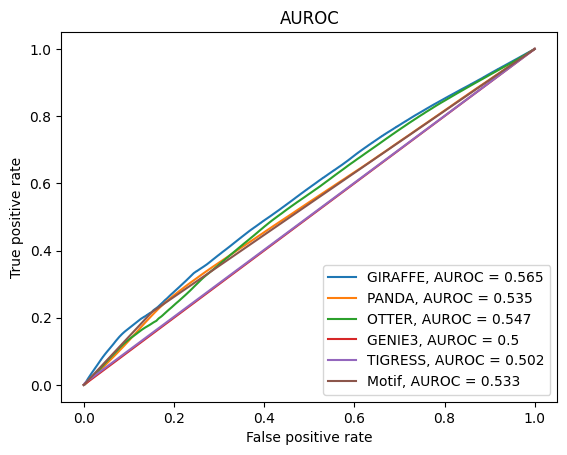

[0.565, 0.535, 0.547, 0.5, 0.502, 0.533]

In [28]:
notebooks.utils.plot_auroc(chip.to_numpy(), [R_giraffe.to_numpy(), R_panda.to_numpy(), R_otter.to_numpy(), R_genie.to_numpy(), R_tigress.to_numpy(), R_motif.to_numpy()], ["GIRAFFE", "PANDA", "OTTER", "GENIE3", "TIGRESS", "Motif"])

## References

[1] Glass K, Huttenhower C, Quackenbush J, Yuan GC. "Passing Messages Between Biological Networks to Refine Predicted Interactions", PLoS One, 2013 May 31;8(5):e64832

[2] Weighill, Deborah, et al. "Gene regulatory network inference as relaxed graph matching." Proceedings of the... AAAI Conference on Artificial Intelligence. AAAI Conference on Artificial Intelligence. Vol. 35. No. 11. NIH Public Access, 2021.

[3] Huynh-Thu, Vân Anh, et al. "Inferring regulatory networks from expression data using tree-based methods." PloS one 5.9 (2010): e12776.

[4] Haury, Anne-Claire, et al. "TIGRESS: trustful inference of gene regulation using stability selection." BMC systems biology 6.1 (2012): 1-17.

[5] Gao, Shang, Yang Dai, and Jalees Rehman. "A Bayesian inference transcription factor activity model for the analysis of single-cell transcriptomes." Genome Research 31.7 (2021): 1296-1311.